In [1]:
# Integration of biopsies and organ donors from 2 studies
import anndata, numpy as np, pandas as pd, imp, lpy, scanpy as sc
sc.logging.print_header()
%load_ext rpy2.ipython
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/scvi/__init__.py:31: DeprecationWarning: scvi is deprecated, please uninstall scvi via `pip uninstall scvi` and install the new scvi-tools package at github.com/YosefLab/scvi-tools
  warnings.warn(deprecation_msg, DeprecationWarning)


scanpy==1.6.0 anndata==0.7.5 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.2 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1 leidenalg==0.7.0


In [2]:
adata = anndata.read_h5ad("N5-integrated_donors.h5ad")
adata_org = anndata.read_h5ad("../../../organoids/scRNAseq/organoids_bulk/N3-integrated_organoids.h5ad")

In [3]:
imp.reload(lpy)
annotation = "bulkorg"
adata_org.obs["bulkorg"] = pd.Categorical(adata_org.obs["bulkorg"],categories= np.array(adata_org.obs["bulkorg"].cat.categories, dtype="object")[[0,1,2,3,4,5,6,7,8,10,9,11,12,13]])
cell_filter_src = [ x not in ["filtered", "doublets", "Low QC"] for x in  adata_org.obs[annotation] ]
adata = lpy.doLogisticRegression(adata, adata_org, annotation , cell_filter_trg = adata.obs["subcluster_epithelial"] != "filtered", cell_filter_src = cell_filter_src , cc_gene_filter_prefix = "",make_circular_coords =True, cosine_coor_softmax_coef = 15.0, genespeficityfraction = 0.5, C_parameter = 0.01 , doinspect=True)

Logisitic regression based projection
def doLogisticRegression(adata, adata_ref, annotation_src, annotation_trg = None, annotation_trg_prob = None, cell_filter_trg = None, cell_filter_src = None, regr_max_iter = 10000, use_variable_genes=True, use_variable_genes_within_subset=True,  cc_gene_filter_prefix= None, use_raw_data=True, use_max_normalization=True, do_compute_cosine_distance=True, filtered_label = "filtered", make_circular_coords=False, cosine_coor_softmax_coef= None, logistic_coor_softmax_coef = None, C_parameter = 1, genespeficityfraction=None, doinspect=False):
    """Compute Logistic regression based projection

    Parameters
    ----------
    adata : Annadata.anndata
        Object containing the cells that are projected
    adata_ref: Annadata.anndata
        Object containing the reference cells that are defining classes used for the projection
    annotation_src : string
        must be in adata_ref.obs.keys(), annotation to project
    annotation_trg : string, optio

<AxesSubplot:>

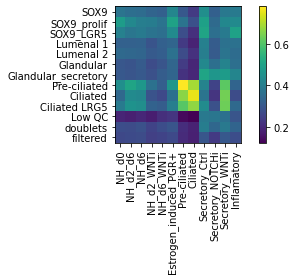

In [4]:
imp.reload(lpy)
labels = ['NH_d0', 'NH_d2_d6', 'NH_d6', 'NH_d2_WNTi', 'NH_d6_WNTi' , 'Estrogen_induced_PGR+', 'Pre-ciliated', 'Ciliated', 'Secretory_Ctrl', 'Secretory_WNTi', 'Secretory_NOTCHi', 'Inflamatory']
lpy.makeValueHeatmap(adata, "lxfcosproj_bulkorg", "subcluster_epithelial_balanced", display_gene_names = labels)

In [5]:
imp.reload(lpy)
annotation = "bulkorg_noinhib"
cell_filter_src = [ x not in ["filtered", "doublets", "Low QC"] for x in  adata_org.obs[annotation] ]
res = lpy.doLogisticRegression(adata,  adata_org, annotation, cell_filter_src = cell_filter_src, cc_gene_filter_prefix = "", make_circular_coords =True, cosine_coor_softmax_coef = 15.0, genespeficityfraction = 0.5, C_parameter = 0.01)

Computing Variable genes within subset
excluding prior cell cycle genes from 2231 variable genes
Filtering gene heuristic
filtered down to 1096 genes
Subsetting objects using 1096 genes
Normalizing from raw data
training set has 36930 cells and test set has 120810 cells
Computing Centroids for Cosine distances
Compute Cosine distances
Learning classes
Projecting labels
Storing results


#print(cl)
#i=3
#np.sum(np.multiply(centroid[:,i], centroid[:,i]), axis =0)
print(centroid)
        
print(centroid)
centroid[0,:]

In [6]:
adata.write_h5ad("N7-integrated_donors.h5ad")

Index(['NH_d0', 'NH_d2_d6', 'NH_d6', 'NH_d2_WNTi', 'NH_d6_WNTi',
       'Estrogen_induced_PGR+', 'Pre-ciliated', 'Ciliated', 'Secretory_Ctrl',
       'Secretory_WNTi', 'Secretory_NOTCHi', 'Inflamatory', 'Low QC',
       'filtered'],
      dtype='object')


<AxesSubplot:>

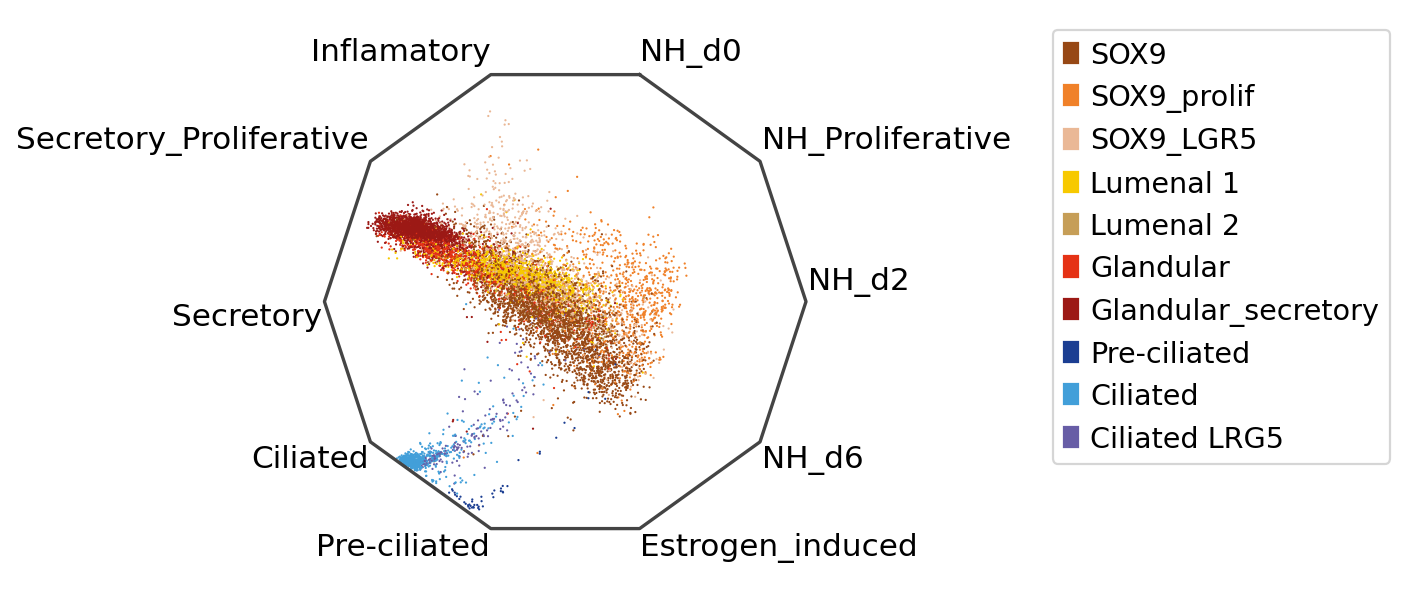

In [7]:
adata2 = adata[ [x not in ["filtered", "Low QC", "doublets"] for x in adata.obs["subcluster_epithelial_balanced"] ] ]
sc.set_figure_params(figsize= [9,4])
labels = ['NH_d0', 'NH_Proliferative', 'NH_d2', 'NH_d6','Estrogen_induced', 'Pre-ciliated', 'Ciliated', 'Secretory', 'Secretory_Proliferative', 'Inflamatory']
print(adata_org.obs["bulkorg"].cat.categories)
lpy.makeWheelPlot(adata2, "X_lxfcosproj_bulkorg_noinhib", "subcluster_epithelial_balanced",  labels, pt_size =1 , save = "wheel.pdf")

<AxesSubplot:>

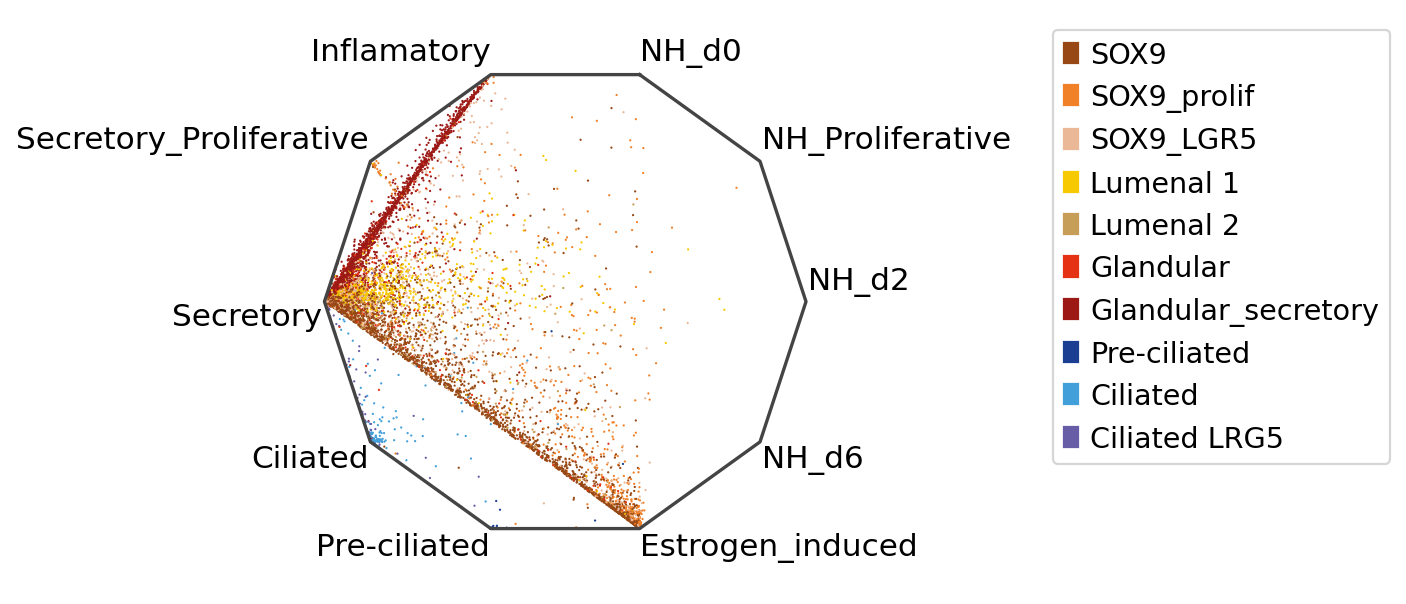

In [8]:
#lpy.makeWheelPlot(adata2, "X_logistproj_bulkorg_noinhib_0.01", "subcluster_epithelial_balanced",  labels, pt_size =1 , save = "wheelogist.pdf")
lpy.makeWheelPlot(adata2, "X_logistproj_bulkorg_noinhib_0.01", "subcluster_epithelial_balanced",  labels, pt_size =1 , save = "wheelogist.pdf")


Trying to set attribute `.obs` of view, copying.


                     0
0             Lymphoid
1              Myeloid
2    Endothelial ACKR1
3   Endothelial SEMA3G
4             PV MYH11
5            PV STEAP4
6                 uSMC
7           Fibroblast
8                   eS
9                   dS
10            Epi_SOX9
11            Ciliated
12           Glandular
13             Lumenal


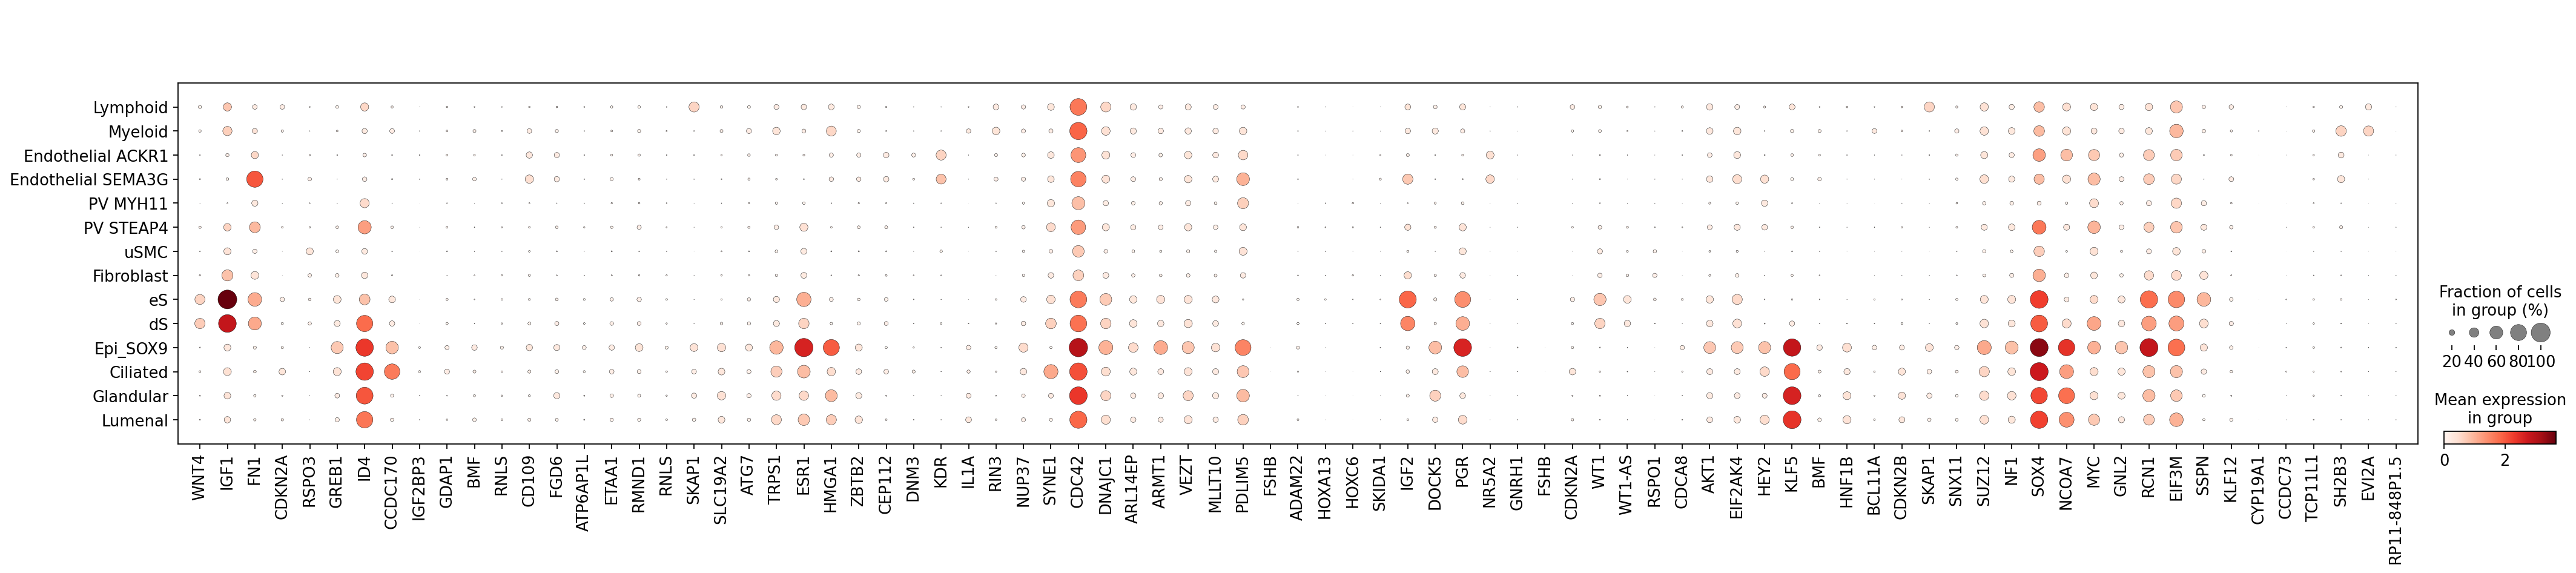

In [9]:
adata2 = adata[ [x not in ["filtered", "Other"] for x in adata.obs["general_celltypes"] ] ]
adata2.obs["general_celltypes"] = lpy.applyFactorRename(adata2.obs["general_celltypes"], {"Fibroblast C7": "Fibroblast", "Fibroblast eS" : "eS" , "Fibroblast dS" : "dS", "SOX9" : "Epi_SOX9"})
adata2.obs["general_celltypes"] = lpy.reorderCat(adata2.obs["general_celltypes"], [12,8,11,5,6,4,9,0,1,2,3,10,13,7])
#adata2.obs["general_celltypes"]= lpy.reorderCat(
#    lpy.applyFactorRename(adata2.obs["fine_celltypes"], {"Fibroblast C7": "Fibroblast", "Fibroblast eS" : "eS" , "Fibroblast dS" : "dS"}), 
#    [13, 14, 15, 16,17,18,19,0,1,2,4,5,3,10,11,12,8,9,6,7])
genes = ["WNT4", "IGF1", "FN1", "CDKN2A", "RSPO3", "GREB1", "ID4", "CCDC170", "IGF2BP3", "GDAP1", "BMF", "RNLS", "CD109", "FGD6", "ATP6AP1L", "ETAA1", "RMND1", "RNLS", "SKAP1", "SLC19A2", "ATG7", "TRPS1", "ESR1", "HMGA1", "ZBTB2", "CEP112", "DNM3", "KDR", "IL1A", "RIN3", "NUP37", "SYNE1", "CDC42", "DNAJC1", "ARL14EP", "ARMT1", "VEZT", "MLLT10", "PDLIM5", "FSHB", "ADAM22", "HOXA13", "HOXC6", "SKIDA1", "IGF2", "DOCK5", "PGR", "NR5A2", "GNRH1", "FSHB", "CDKN2A", "WT1", "WT1-AS", "RSPO1", "CDCA8", "AKT1", "EIF2AK4", "HEY2", "KLF5", "BMF", "HNF1B", "BCL11A", "CDKN2B", "SKAP1", "SNX11", "SUZ12", "NF1", "SOX4", "NCOA7", "MYC", "GNL2", "RCN1", "EIF3M", "SSPN", "KLF12", "CYP19A1", "CCDC73", "TCP11L1", "SH2B3", "EVI2A", "RP11-848P1.5"]
sc.pl.dotplot(adata2, var_names= genes, groupby= "general_celltypes", use_raw=False, save = "markers_general.pdf")


Trying to set attribute `.obs` of view, copying.


           0
0   Ciliated
1       SOX9
2  Glandular
3    Lumenal


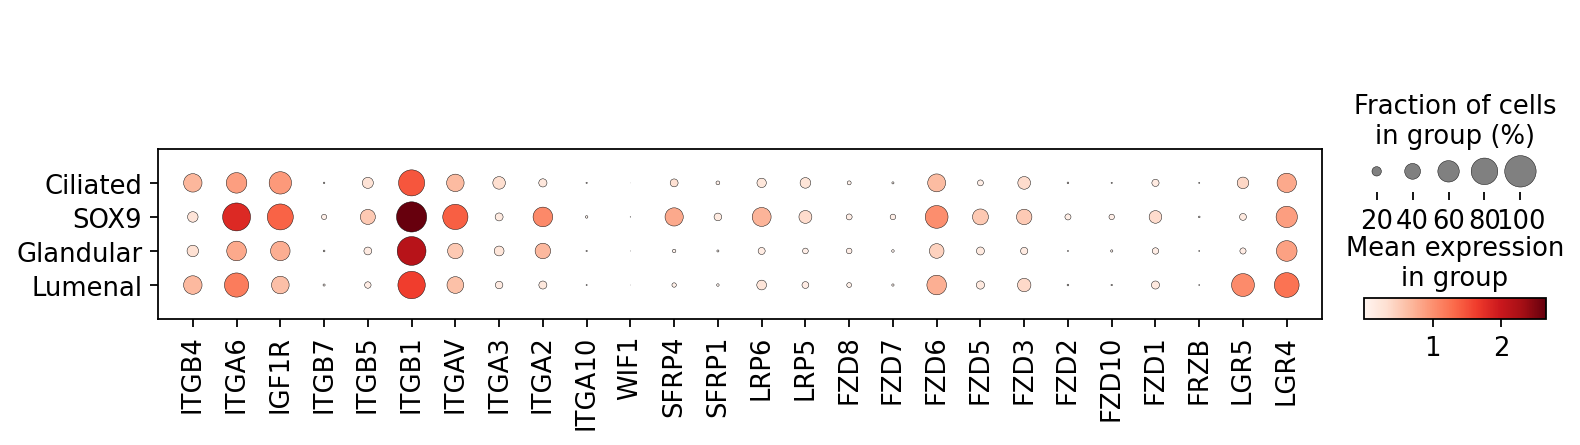

In [10]:
adata2 = adata[ [x in ["SOX9", "Glandular", "Lumenal", "Ciliated"] for x in adata.obs["general_celltypes"] ] ]
adata2.obs["general_celltypes"] = lpy.reorderCat(adata2.obs["general_celltypes"],  [3, 0, 2, 1])
genes = ["ITGB4","ITGA6","IGF1R","ITGB7","ITGB5","ITGB1","ITGAV","ITGA3","ITGA2","ITGA10","WIF1","SFRP4","SFRP1","LRP6","LRP5","FZD8","FZD7","FZD6","FZD5","FZD3","FZD2","FZD10","FZD1","FRZB","LGR5","LGR4"]
sc.pl.dotplot(adata2, var_names= genes, groupby= "general_celltypes", use_raw=False, save = "markers_general.pdf")


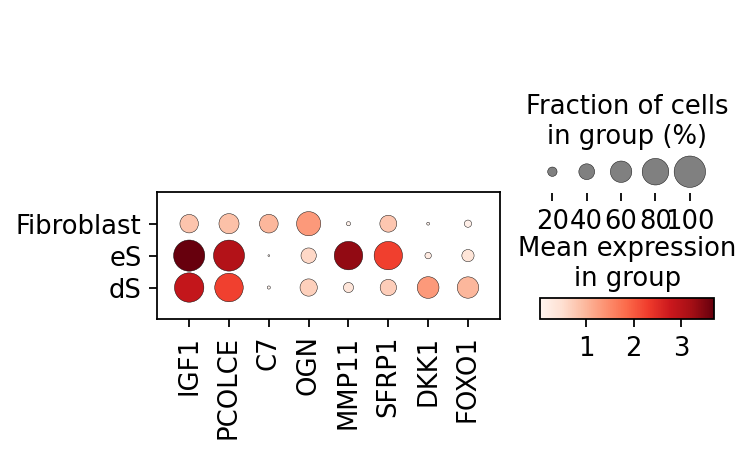

In [11]:
adata2 = adata2[ [x in ["Fibroblast", "eS" ,  "dS" ] for x in adata2.obs["general_celltypes"] ] ]
genes = ["IGF1","PCOLCE", "C7", "OGN" , "MMP11", "SFRP1", "DKK1" , "FOXO1"]
sc.pl.dotplot(adata2, var_names= genes, groupby= "general_celltypes", use_raw=False, save = "markers_general.pdf")